# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [380]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [381]:
data = pd.read_csv('Classified Data')

In [382]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [383]:
scaler = StandardScaler()


**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [384]:
scaler.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [385]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [386]:
from sklearn.model_selection import train_test_split
X = df_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.20, random_state=101)

In [387]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [388]:
pred = knn.predict(X_test)
pred


array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [389]:
y_test_list = y_test.tolist()
y_test_list

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1]

### Evaluation of classification quality using Confusion Matrix

In [390]:
conf_matrix = confusion_matrix( y_test_list,pred)
conf_matrix

array([[95, 11],
       [ 7, 87]], dtype=int64)

***Print Misclassification error rate***

In [391]:
np.mean(pred != y_test_list)

0.09

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [392]:
#from sklearn.model_selection import KFold,cross_val_score
#from sklearn.linear_model import LogisticRegression


#X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    #test_size=0.40, random_state=101)

#X_train_part,X_val,Y_train_part,Y_val =  train_test_split(X_train,y_train,
                                                    #test_size=0.25, random_state=101)
#cv = KFold(n_splits=10,random_state=None, shuffle=False)

#model = KNeighborsClassifier(n_neighbors=1)
#model.fit(X_train,y_train)

#scores = cross_val_score(model,X_train_part,Y_train_part,cv=cv)
#print(scores) 

In [393]:
folds=range(2,20)
means = list()
mins = list()
maxs = list()


In [394]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean 
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.20, random_state=101)




In [395]:
for k in folds:
  
    model=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,X_train,Y_train,scoring='accuracy', cv=4, n_jobs=-1)
    K_means = 1-mean(scores)
    K_mins = 1-scores.min()
    K_maxs = 1-scores.max()
    means.append(K_means)
    mins.append(K_means-K_mins)
    maxs.append(K_maxs - K_means)
    

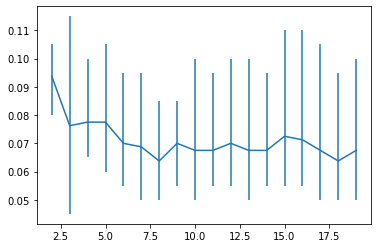

In [396]:

pyplot.errorbar(folds,means,yerr=[mins,maxs])
pyplot.show()

In [397]:
means

[0.09375,
 0.07625000000000004,
 0.07750000000000001,
 0.07750000000000001,
 0.06999999999999995,
 0.06875000000000009,
 0.06375000000000008,
 0.06999999999999995,
 0.0675,
 0.0675,
 0.07000000000000006,
 0.0674999999999999,
 0.0675,
 0.07250000000000001,
 0.07125000000000004,
 0.0674999999999999,
 0.06375000000000008,
 0.0675]

In [398]:
best_k = np.argmin(means) + 2
best_k

8

In [399]:
final = KNeighborsClassifier(n_neighbors=8)
final.fit(X_train,Y_train)
prediction = final.predict(X_test)
Y_test_final_list = Y_test.tolist()
np.mean(prediction != Y_test_final_list)

0.065